In [1]:
import MGEmu as mgemu
import matplotlib.pyplot as plt
import numpy as np

/opt/anaconda3/lib/python3.12/site-packages/MGEmu


## Parameter ranges for fr emulator (see [here](https://github.com/nebblu/ReACT-emus/tree/main) for more information) 
| parameter         | limits                |
| :---:             | :---:                 |
| Omega_m           | [0.24, 0.35]          |
| Omega_b           | [0.04, 0.06]          |
| H0                | [63, 75]              |
| ns                | [0.9, 1.01]           |
| Omega_nu          | [0., 0.00317]         |
| As                | [1.7,2.5]*10^{-9}     |
| fR0               | [10^{-10},10^{-4}].   |
| z                 | [0.0, 2.]             |
| k [h/Mpc]         | [0.01, 3]             |


## Parameter ranges for dgp emulator (see [here](https://github.com/nebblu/ReACT-emus/tree/main) for more information) 
| parameter         | limits                |
| :---:             | :---:                 |
| Omega_m           | [0.2899,0.3392]          |
| Omega_b           | [0.04044,0.05686]          |
| H0                | [62.9, 73.1]              |
| ns                | [0.9432, 0.9862]           |
| Omega_nu          | [0., 0.00317]         |
| As                | [1.5,2.7]*10^{-9}     |
| omega_rc               | [0.001, 100]   |
| z                 | [0.0, 2.4]             |
| k [h/Mpc]         | [0.01, 5]             |


## Parameter ranges for ds emulator
| parameter         | limits                |
| :---:             | :---:                 |
| Omega_m           | [0.22,0.37]          |
| Omega_b           | [0.03,0.08]          |
| H0                | [63, 84]              |
| ns                | [0.8, 1.1]           |
| Omega_nu          | [0., 0.00317]         |
| As                | [1.7,2.5]*10^{-9}     |
| w0               | [-1.3,-0.5]   |
| wa               | [-2.0,0.5]   |
| xi               | [0,150]   |
| z                 | [0.0, 2.5]             |
| k [h/Mpc]         | [0.01, 5]             |


see [here](https://github.com/nebblu/ReACT-emus/tree/main)
## Parameter ranges for mu(k;z) emulator (see Eq.3.6 of [this paper](https://arxiv.org/pdf/2411.12026) and [this paper](https://arxiv.org/abs/2210.01094))
| parameter         | limits                |
| :---:             | :---:                 |
| Omega_m           | [0.24,0.4]          |
| Omega_b           | fixed to 0.049          |
| H0                | [60.,84.]              |
| ns                | fixed to 0.9649          |
| Omega_nu          | fixed to 0.0        |
| As                | [1.7,2.5]*10^{-9}     |
| w0               | [-1.5,-0.5]   |
| wa               | [-0.5,0.5]   |
| mu0               | [-0.999,3.]   |
| c1               | [-0.3333,1.]   |
| lam               | [0.,2.]   |
| q1               | [-2.,2.]   |
| q2               | [-2.,2.]   |
| q3               | [-2.,2.]   |
| z                 | [0.0, 2.5]             |
| k [h/Mpc]         | [0.01, 5]             |

## Calculate the boost for LCDM and MG

In [8]:
params = {
    'Omega_m'     :  [0.315, 0.315],
    'Omega_b'  :  [0.05, 0.05],
    'ns'            :  [0.96, 0.96],
    'H0'        :  [67, 67],
    'Omega_nu' :  [0.0, 0.0],
    'As'            :  [2.0e-9,2.0e-9],
    'w0'            :  [-1.1,-1.1],
    'wa'            :  [0.1,0.1],
    'xi'            :  [100.,100.],
    'fR0'            :  [1e-10,1e-10],
    'omegarc'            :  [0.0,0.0],
    'gamma'            :  [0.55,0.55],
    'mu0'            :  [0,0],
    'c1'            :  [0,0],
    'lam'            :  [0,0],
    'q1'            :  [0.0,0.0],
    'q2'            :  [0.0,0.0],
    'q3'            :  [0.0,0.0],
    'z'             :  [0., 1.]
}

#available emulators: fr, dgp, gamma, ds 
emulator = mgemu.MG_boost(model='dgp')
kvals, boost_nl = emulator.get_nonlinear_boost(**params)

Loading nonlinear emulator...
Nonlinear emulator loaded in memory.


/var/folders/lq/n443ff8j7_b9vcpq9zzxbnym0000gp/T/ipykernel_32988/1360717846.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(title='$z=1$', loc='lower left')


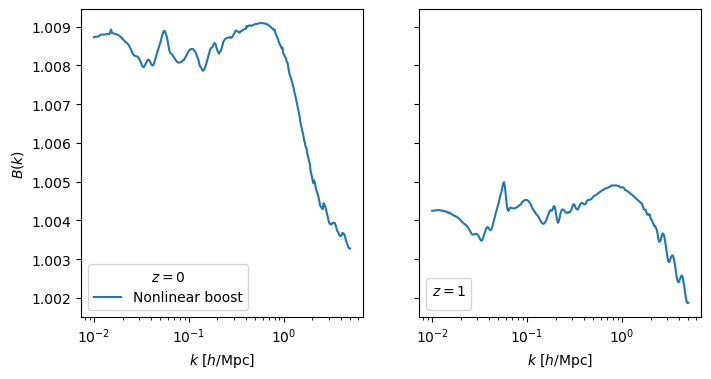

In [10]:
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)
ax[0].semilogx(kvals, boost_nl[0], label="Nonlinear boost")
ax[1].semilogx(kvals, boost_nl[1])
ax[0].set_xlabel("$k$ [$h$/Mpc]");ax[1].set_xlabel("$k$ [$h$/Mpc]")
ax[0].set_ylabel("$B(k)$")
ax[0].legend(title='$z=0$', loc='lower left')
ax[1].legend(title='$z=1$', loc='lower left')

# Try out the mu(k;z) emulator with screening

In [17]:
params = {
    'Omega_m'     :  [0.315, 0.315],
    'H0'        :  [67, 67],
    'As'            :  [2.0e-9,2.0e-9],
    'w0'            :  [-1.1,-1.1],
    'wa'            :  [0.1,0.1],
    'mu0'            :  [1,1],
    'c1'            :  [0.2,0.2],
    'lam'            :  [0.1,0.1],
    'q1'            :  [1.,1.],
    'q2'            :  [1.0,1.0],
    'q3'            :  [0.3,0.3],
    'z'             :  [0., 1.]
}

#available emulators: fr, dgp, gamma, ds 
emulator = mgemu.MG_boost(model='mu')
kvals, boost_nl = emulator.get_nonlinear_boost(**params)

Loading nonlinear emulator...
Nonlinear emulator loaded in memory.


/var/folders/lq/n443ff8j7_b9vcpq9zzxbnym0000gp/T/ipykernel_33136/1360717846.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(title='$z=1$', loc='lower left')


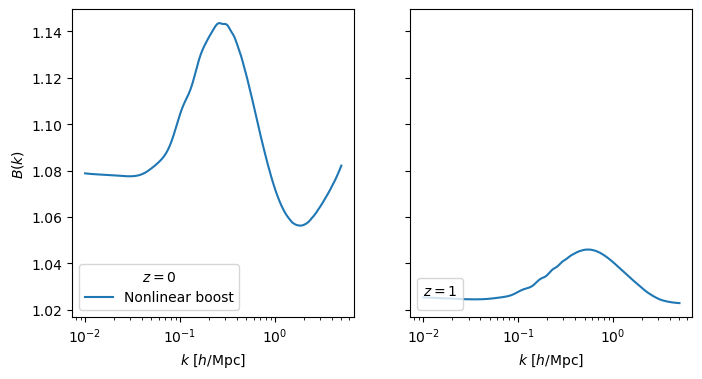

In [19]:
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)
ax[0].semilogx(kvals, boost_nl[0], label="Nonlinear boost")
ax[1].semilogx(kvals, boost_nl[1])
ax[0].set_xlabel("$k$ [$h$/Mpc]");ax[1].set_xlabel("$k$ [$h$/Mpc]")
ax[0].set_ylabel("$B(k)$")
ax[0].legend(title='$z=0$', loc='lower left')
ax[1].legend(title='$z=1$', loc='lower left')